In [58]:
import pandas as pd
import numpy as np

ap_score_dist = pd.read_csv(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/ap_score_distributions.csv',
    skiprows=4,
)

#name columns
ap_score_dist.columns = [
    'Year',
    'n5', 'p5',
    'n4', 'p4',
    'n3', 'p3',
    'n2', 'p2',
    'n1', 'p1',
    'mean',
    'extra'
]
ap_score_dist = ap_score_dist.drop(columns=['extra'])


In [59]:
# convert year to int
ap_score_dist[ap_score_dist['Year'].isna()]
ap_score_dist = ap_score_dist[ap_score_dist["Year"].astype(str).str.isnumeric()]
ap_score_dist = ap_score_dist.dropna(subset=['Year'])


ap_score_dist['Year'] = ap_score_dist['Year'].astype(int)

# convert columns to ints
ap_score_dist['n5'] = ap_score_dist['n5'].astype(str).str.replace(',', '')
ap_score_dist['n5'] = ap_score_dist['n5'].astype(float).astype(int)

ap_score_dist['n4'] = ap_score_dist['n4'].astype(str).str.replace(',', '')
ap_score_dist['n4'] = ap_score_dist['n4'].astype(float).astype(int)

ap_score_dist['n3'] = ap_score_dist['n3'].astype(str).str.replace(',', '')
ap_score_dist['n3'] = ap_score_dist['n3'].astype(float).astype(int)

ap_score_dist['n2'] = ap_score_dist['n2'].astype(str).str.replace(',', '')
ap_score_dist['n2'] = ap_score_dist['n2'].astype(float).astype(int)

ap_score_dist['n1'] = ap_score_dist['n1'].astype(str).str.replace(',', '')
ap_score_dist['n1'] = ap_score_dist['n1'].astype(float).astype(int)

ap_score_dist['mean'] = ap_score_dist['mean'].astype(float)


In [60]:
#percent scoring 3+
ap_score_dist['pct_3_plus'] = ap_score_dist['p3'] + ap_score_dist['p4'] + ap_score_dist['p5']


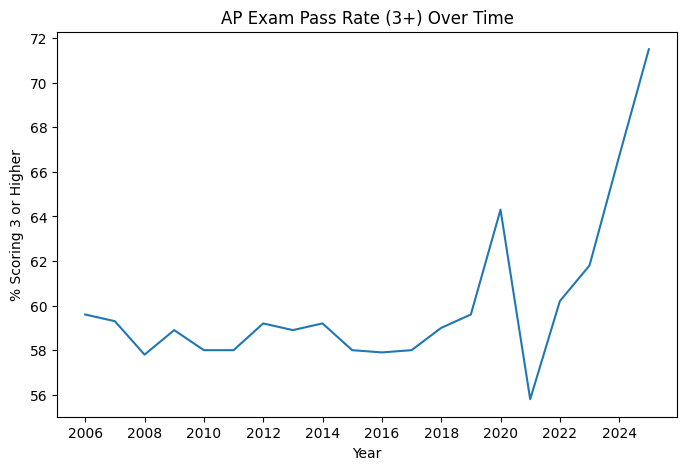

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(ap_score_dist['Year'], ap_score_dist['pct_3_plus'])

plt.xlabel('Year')
plt.ylabel('% Scoring 3 or Higher')
plt.title('AP Exam Pass Rate (3+) Over Time')

plt.xticks(ap_score_dist['Year'][::2])
plt.show()


In [62]:
ap_participation = pd.read_csv(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/ap_participation.csv',
    skiprows=4,
    header=None
)

ap_participation_data = ap_participation.iloc[::2].reset_index(drop=True)
ap_students = ap_participation_data[[0, 3]].copy()
ap_students.columns = ['Year', 'Students']

ap_students['Students'] = (ap_students['Students'].astype(str).str.replace(',', ''))
ap_students = ap_students[ap_students['Students'] != 'nan']
ap_students['Students'] = ap_students['Students'].astype(int)
ap_students.dtypes


Year        object
Students     int64
dtype: object

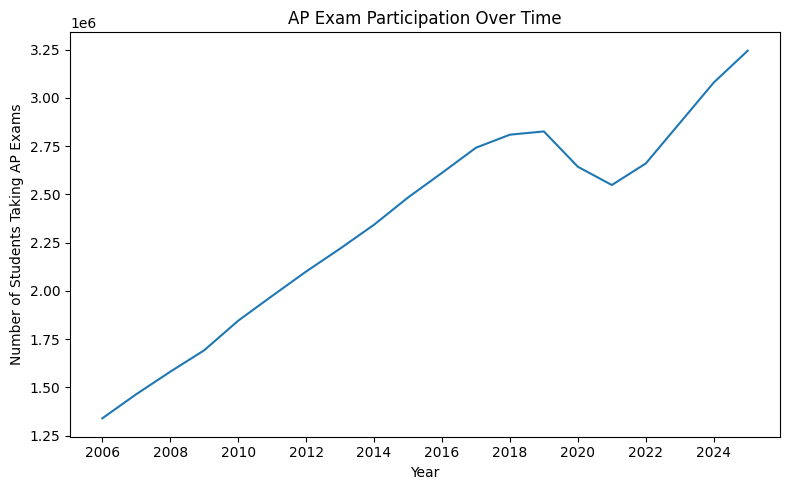

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(ap_students['Year'], ap_students['Students'])

plt.xlabel('Year')
plt.ylabel('Number of Students Taking AP Exams')
plt.title('AP Exam Participation Over Time')

plt.xticks(ap_students['Year'][::2])
plt.tight_layout()
plt.show()



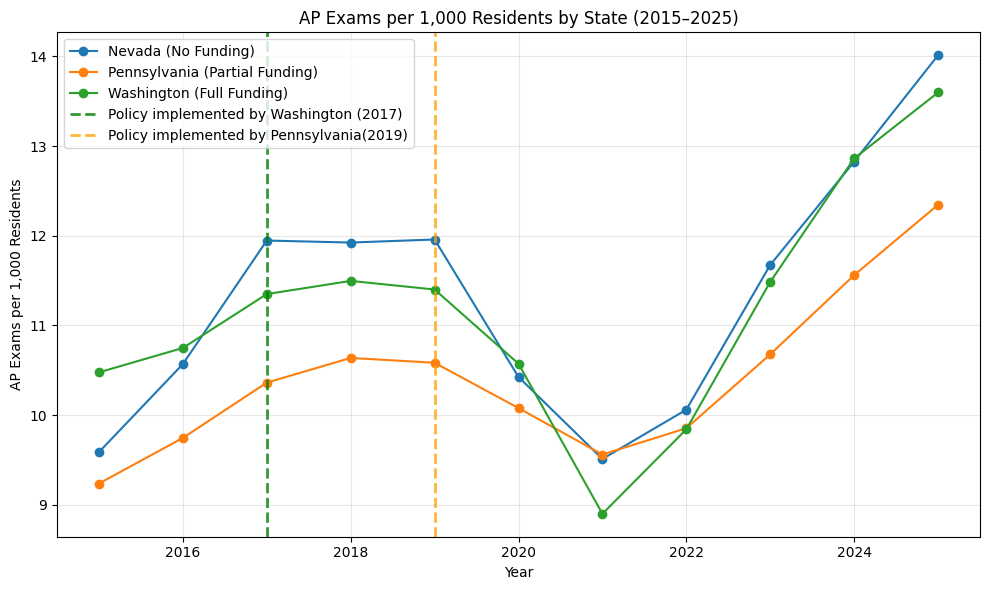

In [64]:
import tabula
import matplotlib.pyplot as plt

ap_state_participation = tabula.read_pdf(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/AP_Volume_By_State.pdf',
    pages="all",
    lattice=True
)
ap_state_participation = ap_state_participation[0]

state_df = ap_state_participation.copy()
state_df = state_df.rename(columns={"Unnamed: 0": "State"})
state_df = state_df[state_df["2015"].notna()]

year_cols = [
    "State",
    "2015", "2016", "2017", "2018", "2019",
    "2020", "2021", "2022", "2023", "2024", "2025"
]

state_df = state_df[year_cols]

for col in year_cols[1:]:
    state_df[col] = (
        state_df[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(int)
    )

states = ["Nevada", "Pennsylvania", "Washington"]

funding_df = state_df[state_df["State"].isin(states)]

population = {
    "Nevada": 3280000,
    "Pennsylvania": 13100000,
    "Washington": 8100000
}
labels = {
    "Nevada": "Nevada (No Funding)",
    "Pennsylvania": "Pennsylvania (Partial Funding)",
    "Washington": "Washington (Full Funding)"
}



long_df = funding_df.melt(
    id_vars="State",
    var_name="Year",
    value_name="AP_Participation"
)
long_df["Year"] = long_df["Year"].astype(int)
long_df["Population"] = long_df["State"].map(population)
long_df["AP_per_1000"] = (
    long_df["AP_Participation"] / long_df["Population"] * 1000
)

plt.figure(figsize=(10, 6))

for state in states:
    subset = long_df[long_df["State"] == state]
    plt.plot(
        subset["Year"],
        subset["AP_per_1000"],
        marker="o",
        label=labels[state]
    )
plt.axvline(
    x=2017,
    color="green",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="Policy implemented by Washington (2017)"
)

plt.axvline(
    x=2019,
    color="orange",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="Policy implemented by Pennsylvania(2019)"
)

plt.title("AP Exams per 1,000 Residents by State (2015–2025)")
plt.xlabel("Year")
plt.ylabel("AP Exams per 1,000 Residents")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()






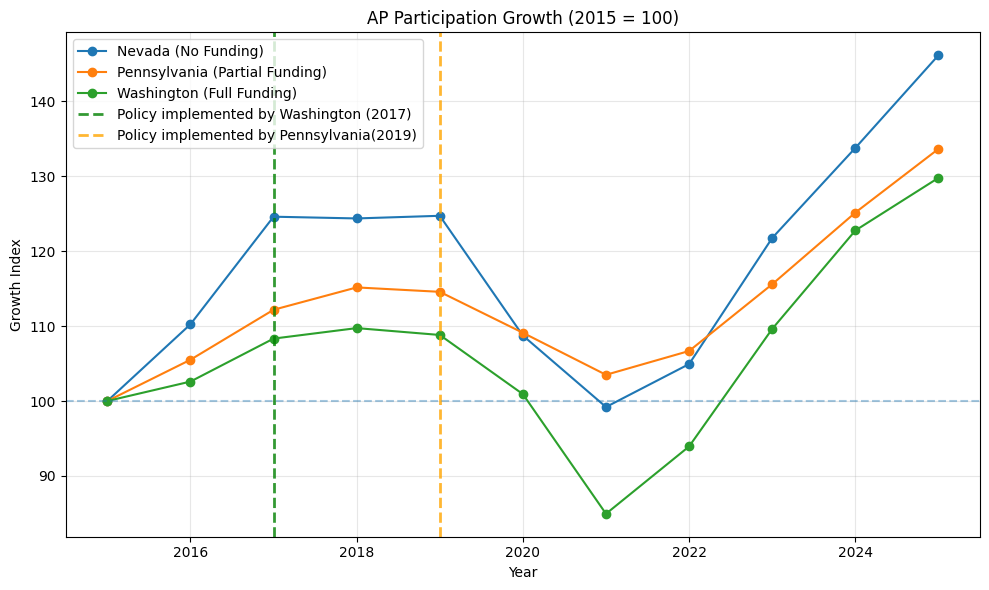

In [65]:
norm_df = long_df.copy()

norm_df["Index_2015"] = (
    norm_df
    .groupby("State")["AP_Participation"]
    .transform(lambda x: x / x.iloc[0] * 100)
)
plt.figure(figsize=(10, 6))

for state in states:
    subset = norm_df[norm_df["State"] == state]
    plt.plot(subset["Year"], subset["Index_2015"], marker="o", label=labels[state])
plt.axvline(
    x=2017,
    color="green",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="Policy implemented by Washington (2017)"
)

plt.axvline(
    x=2019,
    color="orange",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="Policy implemented by Pennsylvania(2019)"
)
plt.axhline(100, linestyle="--", alpha=0.4)
plt.title("AP Participation Growth (2015 = 100)")
plt.xlabel("Year")
plt.ylabel("Growth Index")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


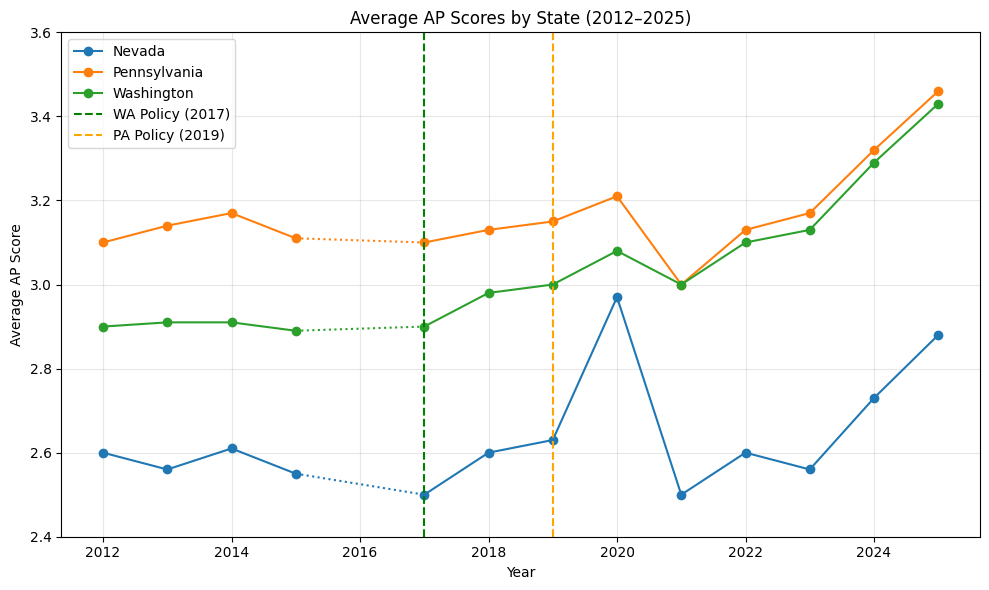

In [66]:
ap_state_score = pd.read_csv(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/Average_AP_Scores_By_State.csv',
)
ap_state_score.columns = ap_state_score.iloc[0]
ap_state_score = ap_state_score.drop(index=0)
ap_state_score = ap_state_score.reset_index(drop=True)

ap_state_score = ap_state_score.rename(columns={
    ap_state_score.columns[0]: "State"
})

ap_state_score = ap_state_score.set_index("State").astype(float).reset_index()

score_long = ap_state_score.melt(
    id_vars="State",
    var_name="Year",
    value_name="Average_Score"
)

score_long["Year"] = score_long["Year"].astype(int)

states = ["Nevada", "Pennsylvania", "Washington"]

plt.figure(figsize=(10,6))

for state in states:
    subset = score_long[score_long["State"] == state]

    line, = plt.plot(
        subset["Year"],
        subset["Average_Score"],
        marker="o",
        label=state
    )

    y_2015 = subset[subset["Year"] == 2015]["Average_Score"].values[0]
    y_2017 = subset[subset["Year"] == 2017]["Average_Score"].values[0]

    plt.plot(
        [2015, 2017],
        [y_2015, y_2017],
        linestyle="dotted",
        color=line.get_color()  
    )



plt.axvline(2017, color="green", linestyle="--",
            label="WA Policy (2017)")
plt.axvline(2019, color="orange", linestyle="--",
            label="PA Policy (2019)")

plt.title("Average AP Scores by State (2012–2025)")
plt.xlabel("Year")
plt.ylabel("Average AP Score")
plt.ylim(2.4, 3.6)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()